## Euro to USD Conversion - Time Series Forecasting

**Importing the required libraries & packages**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import pickle
import warnings
warnings.filterwarnings('ignore')

**Changing the Default Working Directory Path & Reading the Dataset using Pandas Command and displaying first five records of the dataset**

In [2]:
os.chdir('C:\\Users\\mural\\Desktop\\Foreing Excahge')
df = pd.read_csv('BOE-XUDLERD.csv')
df.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


## Exploratory Data Analysis(EDA)

**Getting the shape of the dataset**

In [3]:
df.shape

(10837, 2)

**Checking for the Null values in the dataset**

In [4]:
df.isna().sum()

Date     0
Value    0
dtype: int64

**Checking the duplicated values in the dataset**

In [5]:
df.duplicated().sum()

0

**Checking the data types of the column in the dataset**

In [6]:
df.dtypes

Date      object
Value    float64
dtype: object

**Getting the summary of various descriptive statistics for the numeric column in the dataset**

In [7]:
df.describe()

,Value
count,10837.000000
mean,0.864988
std,0.153289
min,0.626000
25%,0.759800
50%,0.826300
75%,0.920300
max,1.551900


##  Data Preprocessing

**changing the datatype of `Date` column as <span style="color:red">Datetime</span> using Pandas command**

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

**Changing the `Date` column as the index column of the dataset and also displaying the first five records of the dataset**

In [9]:
df = df.set_index('Date')
df.head()

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608


## Data Visualization

**Plotting the line graph to show that the data trend in the dataset and saving the PNG file**

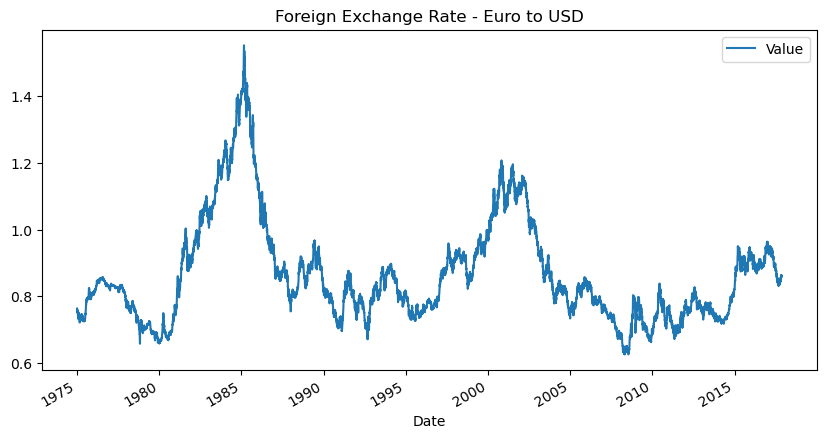

In [10]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - Euro to USD')
plt.savefig('Foreign Exchange Rate - Euro to USD.png')
plt.show()

**Resampling the dataset to weekly frequency since the given data has more number of observations that takes Longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records
of the resampled dataset**

In [11]:
df_week = df.resample('W').mean()
print('Counts of the Weekly DataFrame :', df_week.shape[0])
df_week.head()

Counts of the Weekly DataFrame : 2237


,Value
Date,
1975-01-05,0.76090
1975-01-12,0.75346
1975-01-19,0.75546
1975-01-26,0.74388
1975-02-02,0.73902


**Plotting the line graph to show that the data trend in the Weekly resampled dataset and saving the PNG file**

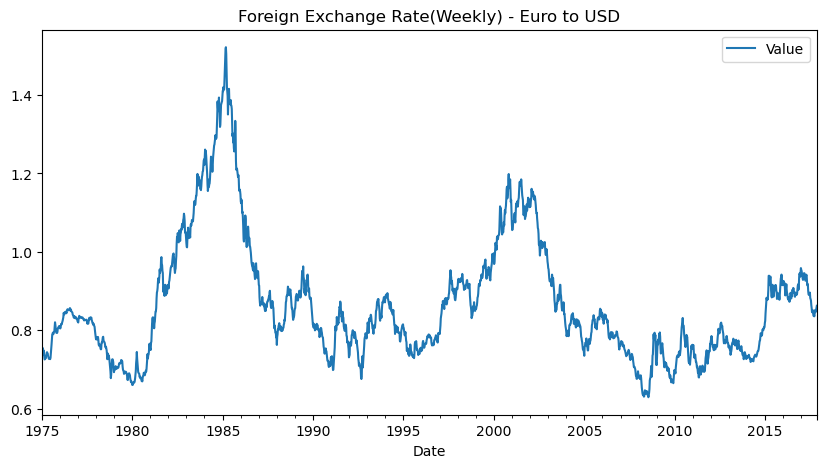

In [12]:
df_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate(Weekly) - Euro to USD')
plt.savefig('Foreign Exchange Rate(Weekly) - Euro to USD.png')
plt.show()

**Resampling the dataset to monthly frequency since the given data has more number of observations that takes Longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records
of the resampled dataset**

In [13]:
df_month = df.resample('M').mean()
print('Counts of the Monthly DataFrame :', df_month.shape[0])
df_month.head()

Counts of the Monthly DataFrame : 515


,Value
Date,
1975-01-31,0.749132
1975-02-28,0.737910
1975-03-31,0.730337
1975-04-30,0.741623
1975-05-31,0.731286


**Plotting the line graph to show that the data trend in the Monthly resampled dataset and saving the PNG file**

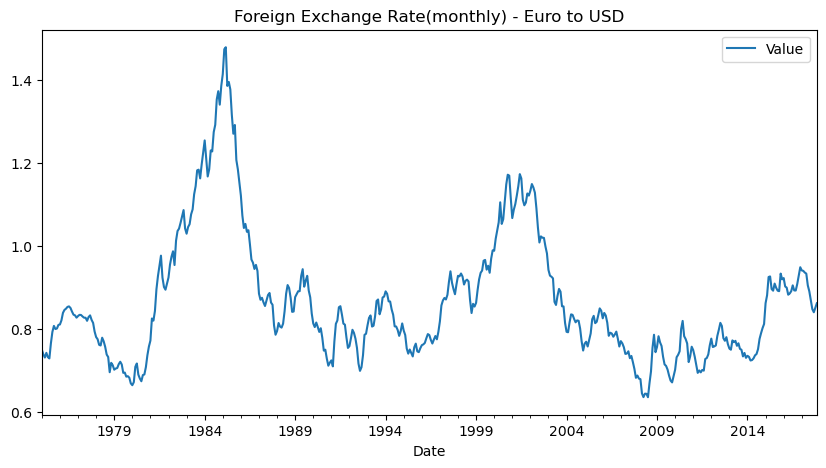

In [14]:
df_month.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate(monthly) - Euro to USD')
plt.savefig('Foreign Exchange Rate(monthly) - Euro to USD.png')
plt.show()

**Resampling the dataset to Yearly frequency since the given data has more number of observations that takes Longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records
of the resampled dataset**

In [15]:
df_year = df.resample('Y').mean()
print('Counts of the Yearly DataFrame :', df_year.shape[0])
df_month.head()

Counts of the Yearly DataFrame : 43


,Value
Date,
1975-01-31,0.749132
1975-02-28,0.737910
1975-03-31,0.730337
1975-04-30,0.741623
1975-05-31,0.731286


**Plotting the line graph to show that the data trend in the Yearly resampled dataset and saving the PNG file**

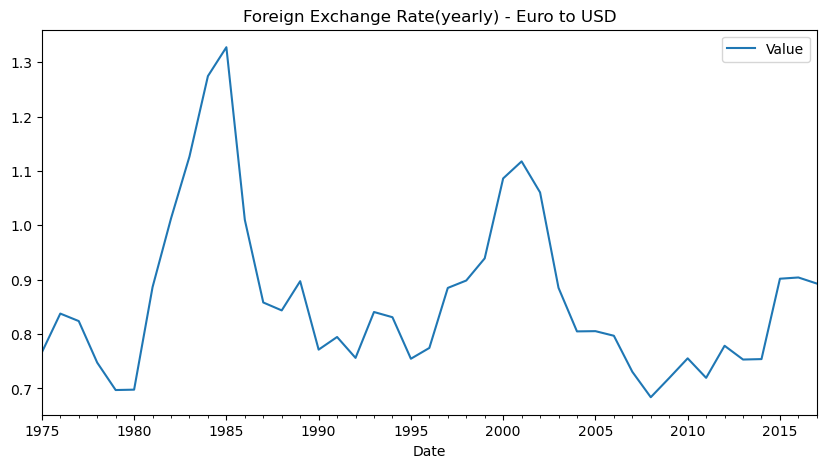

In [16]:
df_year.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate(yearly) - Euro to USD')
plt.savefig('Foreign Exchange Rate(yearly) - Euro to USD.png')
plt.show()

**Plotting the Scatter Plot graph using seaborn to show the data spread in the resampled weekly data and saving the graph as PNG file**

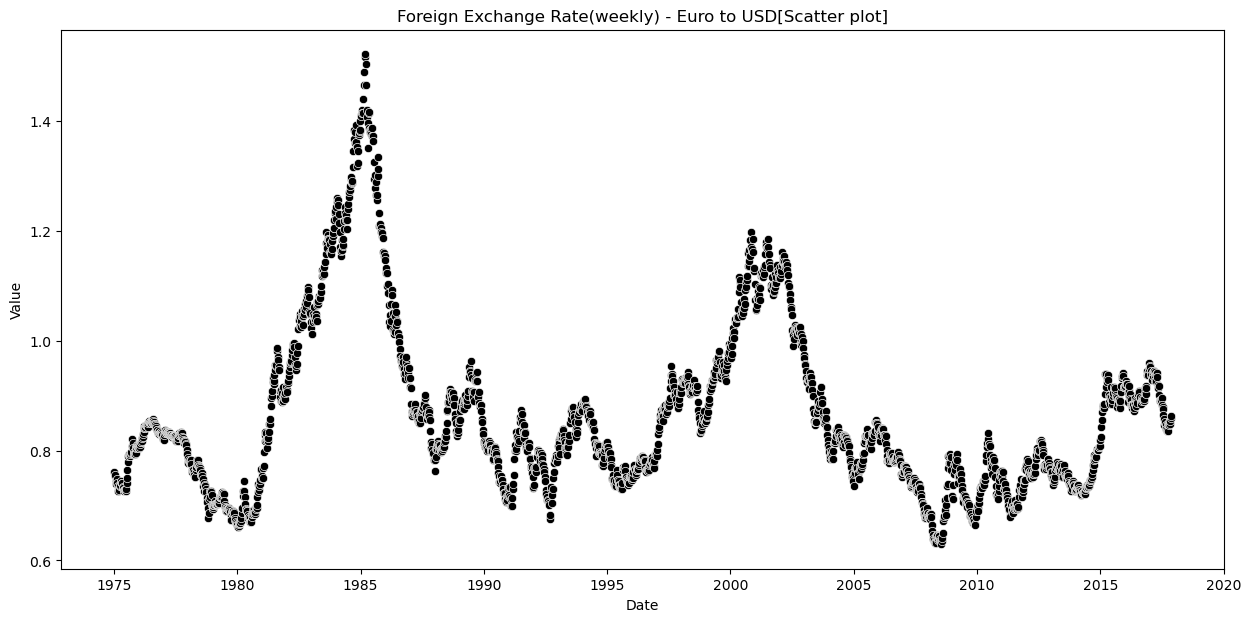

In [17]:
plt.rcParams['figure.figsize'] = 15,7
sns.scatterplot(x = df_week.index, y = df_week.Value, color = 'black')
plt.title('Foreign Exchange Rate(weekly) - Euro to USD[Scatter plot]')
plt.savefig('Foreign Exchange Rate(yearly) - Euro to USD.png[Scatter plot].png')
plt.show()

**Plotting the bar graph using seaborn to show the data spread in the resampled weekly data and saving the graph as PNG file**

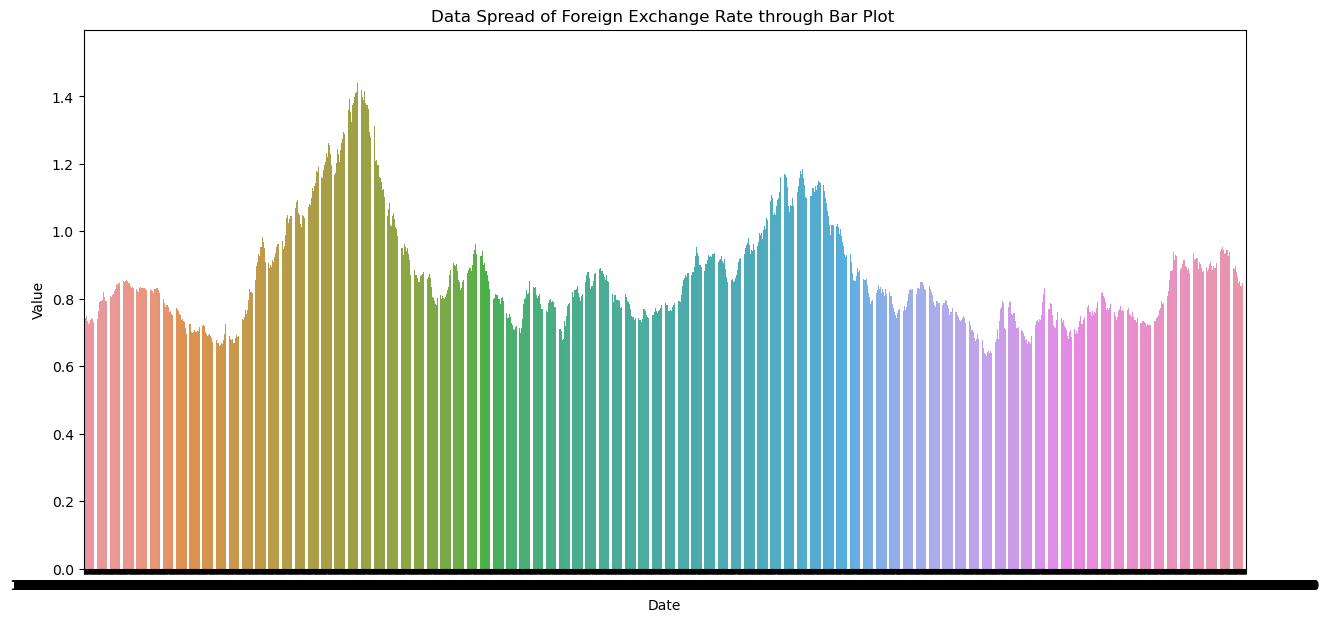

In [18]:
sns.barplot(data = df_week, x = df_week.index, y = df_week.Value)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot ')
plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

**Plotting the bar graph using seaborn to show the data spread in the resampled weekly data and saving the graph as PNG file**

Text(0.5, 1.0, 'Distribution of Data in Foreign exchange Rate - Euro to USD')

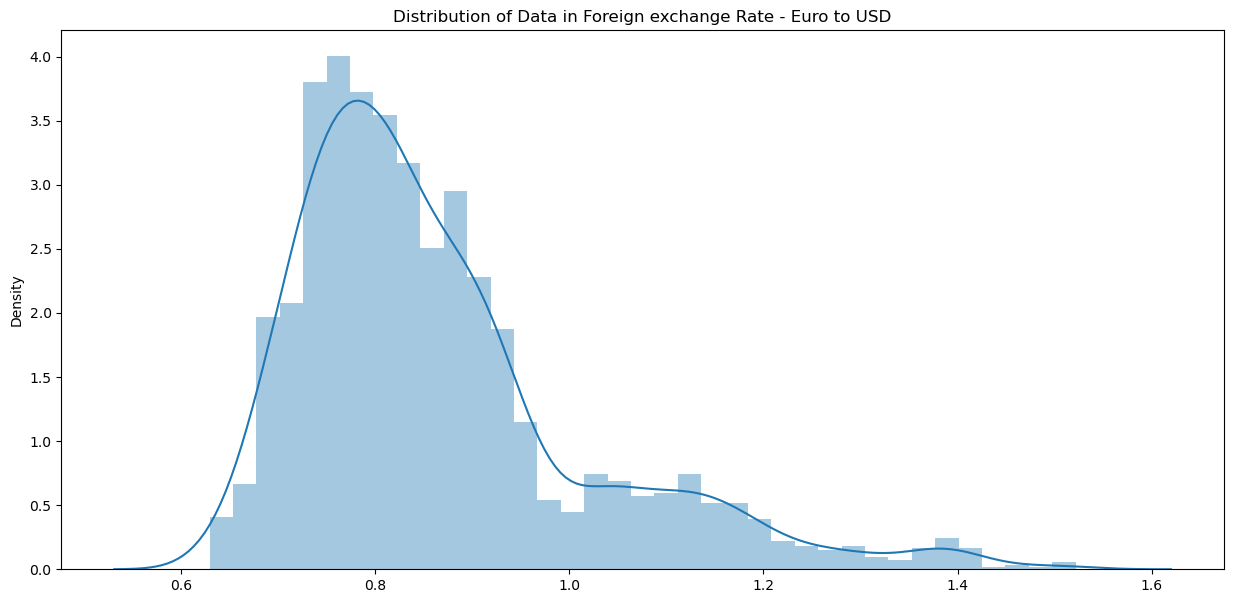

In [19]:
sns.distplot(df_week)
plt.title('Distribution of Data in Foreign exchange Rate - Euro to USD')

**Plotting the histogram and KDE Line Graph to show the distribution of dataset and saving the PNG file**

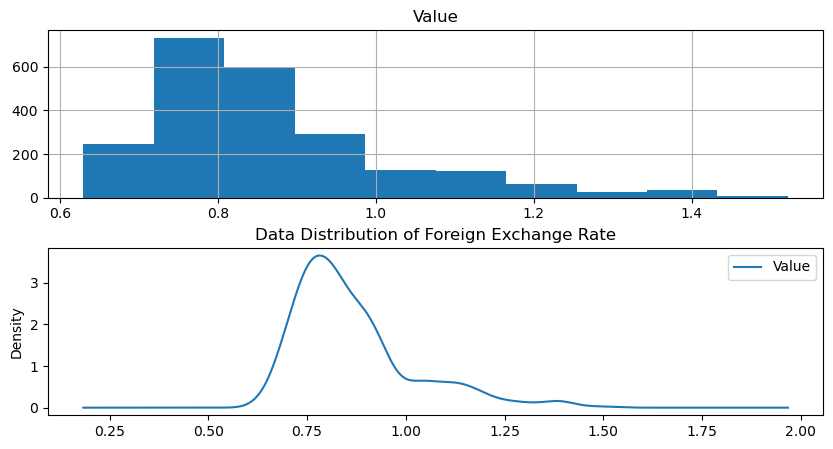

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex =  False, sharey = False, figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde', ax = ax2)
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

**Plottting the graph with "Seasonal Decompose" Function to show the Data Description, Trend, Seasonal, Residuals and saving the graph as PNG file**

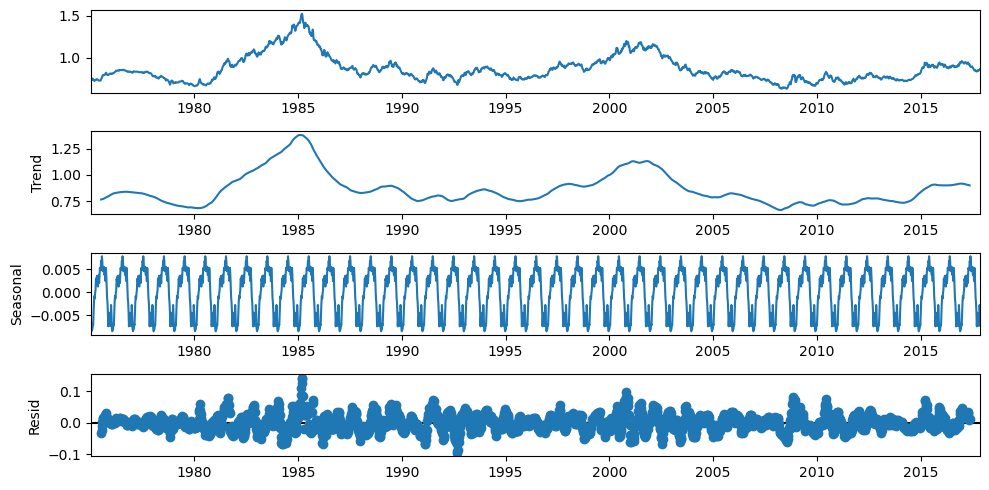

In [21]:
plt.rcParams['figure.figsize'] = 10,5
decomposition = seasonal_decompose(df_week, period = 52, model = 'additive')
decomposition.plot()
plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

**Plotting the graph with Auto-Correlation and partial Auto-Correlation of the data from the dataset and saving the graph as PNG file**

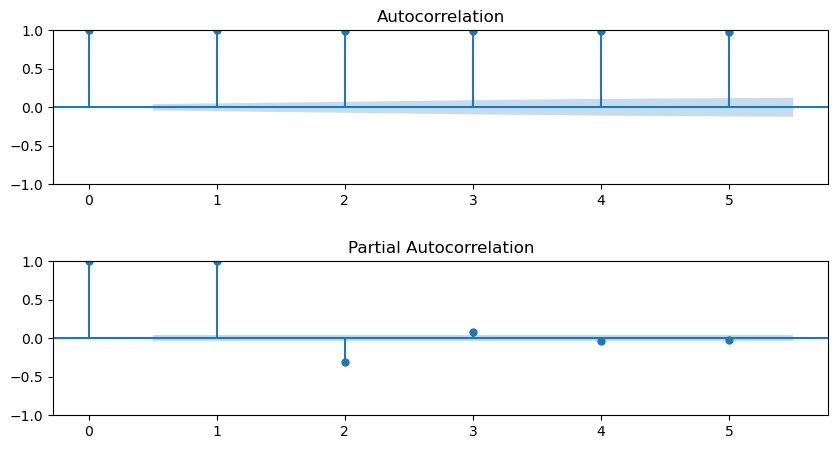

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex =  False, sharey = False, figsize = (10,5))
ax1 = plot_acf(df_week, lags = 5, ax = ax1)
ax2 = plot_pacf(df_week, lags = 5, ax = ax2)
plt.subplots_adjust(hspace = 0.5)
plt.savefig('ACF & PACF.png')
plt.show()

## Data Transformation

_**The `adf_check()` function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary.The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.**_

In [23]:
def adf_check (time_series):
    result = adfuller (time_series)
    print ('Augmented Dickey Fuller Test :')
    labels = ['ADF Test Statistics', 'P Value', 'Number of Lags Used','Number of Observations']
    for value, label in zip(result, labels):
        print (label +' : '+ str (value))
    if result [1] <= 0.05:
        print ('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary ')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

**Performing the Augmented Dickey-Fuller test on the original data in the resampled weekly dataset to find whether the time series is sationary or not**

In [24]:
adf_check(df_week)

Augmented Dickey Fuller Test :
ADF Test Statistics : -2.07634059993305
P Value : 0.25413395509264947
Number of Lags Used : 2
Number of Observations : 2234
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


**Since the Time Series is Not Stationary, the resampled weekly dataset is transformed as a new DataFrame with First Difference to make it as a Stationary Series. Along with that showing the number of observations in the new DataFrame and displaying the first five records of the new DataFrame**

In [25]:
df1_week = df_week.diff().dropna()
print('Counts of the Weekly First Difference DataFrame :', df1_week.shape[0])
df1_week.head()

Counts of the Weekly First Difference DataFrame : 2236


,Value
Date,
1975-01-12,-0.00744
1975-01-19,0.00200
1975-01-26,-0.01158
1975-02-02,-0.00486
1975-02-09,0.01004


**Performing again the augmented Dickey-Fuller test on the original data in the resampled weekly dataset to find whether the time series is sationary or not**

In [26]:
adf_check(df1_week)

Augmented Dickey Fuller Test :
ADF Test Statistics : -30.12898660128547
P Value : 0.0
Number of Lags Used : 1
Number of Observations : 2234
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary 


**Plotting the line graph to show that the data trend in the transformed data  from the resampled Weekly dataset and saving the PNG file**

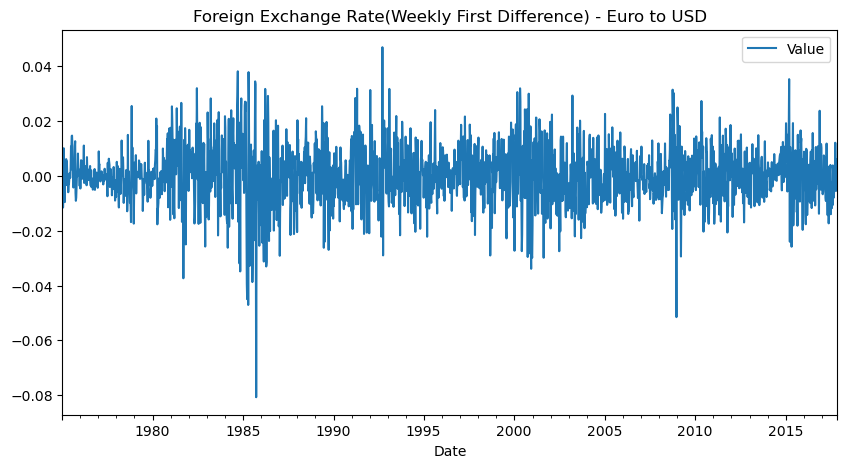

In [27]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate(Weekly First Difference) - Euro to USD')
plt.savefig('Foreign Exchange Rate(Weekly First Difference) - Euro to USD.png')
plt.show()

**Plotting the graph with pandas plotting autocorrelation_plot to show the difference between the Stationary Data and Non-Stationary Data and saving the graph as PNG file**

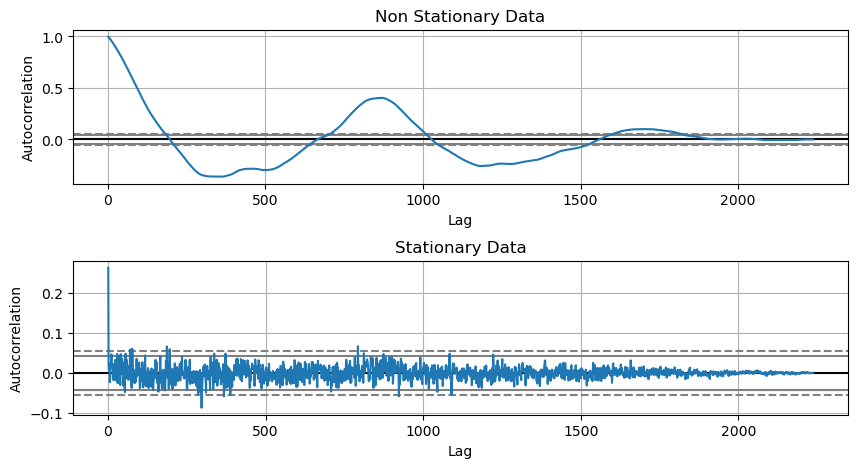

In [28]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
ax1 = autocorrelation_plot(df_week, ax = ax1)
ax1.set_title('Non Stationary Data')
ax2 = autocorrelation_plot(df1_week, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Autocorrelation_plot of Sationary & Non-Stationary.png')
plt.show()

## Model Fitting

**Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters, the best model is evaluated by Least Akaike Information Criterion[AIC]**

In [29]:
model = auto_arima(df_week, m = 52, d = 1, seasonal = False, max_order = 8, test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14195.726, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-14039.528, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14196.131, Time=1.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-14200.250, Time=1.69 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-14041.486, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-14199.705, Time=1.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14199.738, Time=1.63 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14197.726, Time=2.00 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-14202.222, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-14201.680, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-14201.713, Time=0.84 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-14198.107, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-14199.700, Time=0.97 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.198 sec

**Defining the summary of the model fitted with `auto_arima` function, here getting various information such as Akaike Information Criterion[AIC], Bayesian Information Criterion[BIC], Hannan-Quinn Information Criterion[HIQC], Log Likehood etc.from which we can evaluate the model**

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2237
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7103.111
Date:                Thu, 27 Jul 2023   AIC                         -14202.222
Time:                        12:29:58   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Fitting the model in ARIMA model with the best value got from `auto_arima` model in the resampled weekly data and getting the summary of the fitted model**

In [31]:
model = ARIMA(df_week, order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 2237
Model:                 ARIMA(0, 1, 1)   Log Likelihood                7103.111
Date:                Thu, 27 Jul 2023   AIC                         -14202.222
Time:                        12:29:59   BIC                         -14190.797
Sample:                    01-05-1975   HQIC                        -14198.051
                         - 11-12-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2755      0.015     18.107      0.000       0.246       0.305
sigma2         0.0001   2.03e-06     50.197      0.000    9.79e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               635.74
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Plottingt the Diagnostic plot for the fitted model to show the best fit of the model and saving it as PNG file**

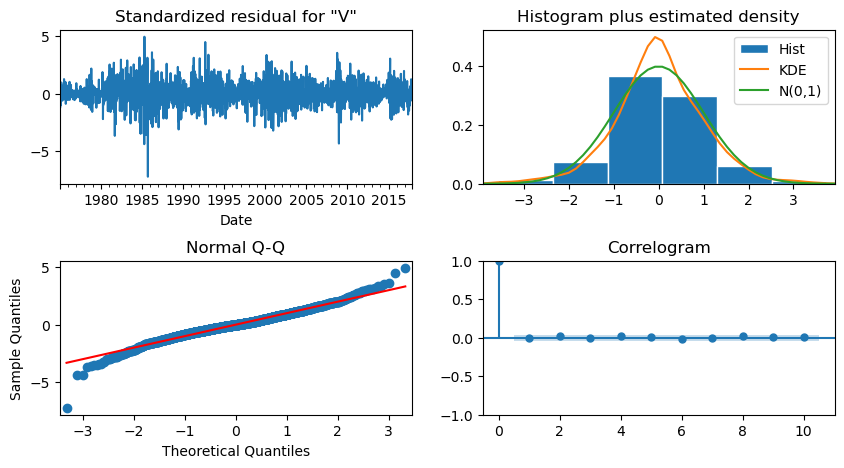

In [32]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.show()

**Predictive the values using test data and renaming it as "Prediction"**

In [33]:
prediction = result.predict(typ = 'levels')

## Model Evaluation

**Evaluating the model with following metrics such as percentage of R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predictied value and Whole data value**

In [34]:
print('Evaluation Results for Whole Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(df_week['Value'],prediction))),'\n')
print(' Mean Squared Error : %.6f'%(mean_squared_error(df_week['Value'],prediction)),'\n')
print(' Root Mean Squared Error',sqrt(mean_squared_error(df_week['Value'],prediction)),'\n')
print(' Mean Absolute Error',mean_absolute_error(df_week['Value'],prediction),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_week['Value'],prediction)),'\n')

Evaluation Results for Whole Data : 

 Percenatge of R2 Score : 98.46 % 

 Mean Squared Error : 0.000361 

 Root Mean Squared Error 0.018991872296134884 

 Mean Absolute Error 0.0077965622688231555 

 Mean Absolute Percentage Error : 0.89 % 



## Result

**Concating the Resampled weekly dataset, weekly first Difference dataframe and the predicted value and naming the columns as `Foreign Exchange Rate(Weekly)`, `Weekly First Difference`, `Predicted Values`and exporting the DataFrame to 
[comma seperated file]csv.file.Also displaying the first five records of the exported DataFrame**    

In [35]:
df_final = pd.concat([df_week, df1_week, prediction],axis = 1)
df_final.columns = ['Foreign Exchange Rate(Weekly)', 'Weekly First Difference', 'Predicted Values']
df_final.to_csv('Foreign Exchange Rate with Prediction(Euro to USD).csv')
df_final.head()

,Foreign Exchange Rate(Weekly),Weekly First Difference,Predicted Values
Date,,,
1975-01-05,0.76090,NaN,0.000000
1975-01-12,0.75346,-0.00744,0.760900
1975-01-19,0.75546,0.00200,0.751555
1975-01-26,0.74388,-0.01158,0.756530
1975-02-02,0.73902,-0.00486,0.740396


## Model Testing

**Splitting the Resampled Weekly Dataset into training data and test data. And displaying the number of observations in the both
training data and test data**

In [36]:
size = int(len(df_week)*0.80)
train, test = df_week[0:size]['Value'], df_week[size:(len(df_week))]['Value']
print('Counts of the Train Data : ', train.shape[0])
print('Counts of the Test Data : ', test.shape[0])

Counts of the Train Data :  1789
Counts of the Test Data :  448


**Creating the list of train dataset values in train_values and empty predictions list which will be appended after the prediction. Then fitting the model with ARIMA model with the best value got from auto_arima model in the train_values data and predicting with test data value and appending it to the predictions list and printing the comparison between predicted value and actual value**

In [37]:
train_values = [x for x in train]
predictions = []
print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(train_values, order=(0,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred_out = output[0]
    predictions.append(float(pred_out))
    test_in = test[t]
    train_values.append(test_in)
    print('predicted=%f, Actual=%f' % (pred_out, test_in))

Printing Predicted vs Expected Values...


predicted=0.752641, Actual=0.759475
predicted=0.761367, Actual=0.767060
predicted=0.768637, Actual=0.757880
predicted=0.754904, Actual=0.747075
predicted=0.744907, Actual=0.734700
predicted=0.731868, Actual=0.728480
predicted=0.727540, Actual=0.714175
predicted=0.710462, Actual=0.705880
predicted=0.704607, Actual=0.714900
predicted=0.717761, Actual=0.719660
predicted=0.720188, Actual=0.715400
predicted=0.714069, Actual=0.711920
predicted=0.711323, Actual=0.716960
predicted=0.718527, Actual=0.712280
predicted=0.710545, Actual=0.703260
predicted=0.701235, Actual=0.707200
predicted=0.708857, Actual=0.696640
predicted=0.693251, Actual=0.703760
predicted=0.706666, Actual=0.704920
predicted=0.704437, Actual=0.699480
predicted=0.698108, Actual=0.701300
predicted=0.702183, Actual=0.688660
predicted=0.684922, Actual=0.681380
predicted=0.680401, Actual=0.679100
predicted=0.678740, Actual=0.685340
predicted=0.687166, Actual=0.679580
predicted=0.677483, A

**Evaluating the model with following metrics such as percentage of R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predictied value and test data**

In [38]:
print('Evaluation Results for test Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(test,predictions))),'\n')
print(' Mean Squared Error',mean_squared_error(test,predictions),'\n')
print(' Root Mean Squared Error',sqrt(mean_squared_error(test,predictions)),'\n')
print(' Mean Absolute Error',mean_absolute_error(test,predictions),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,predictions)),'\n')

Evaluation Results for test Data : 

 Percenatge of R2 Score : 98.96 % 

 Mean Squared Error 6.681519249208368e-05 

 Root Mean Squared Error 0.008174056061227111 

 Mean Absolute Error 0.006431044705719191 

 Mean Absolute Percentage Error : 0.81 % 



**Making the predicted value as series and index as same as Test data index since the prediction is based on Test Data**

In [39]:
predictions_df = pd.Series(prediction, index = test.index)

**Plotting the graph with predicted data and the resampled weekly data and saving it as PNG file**

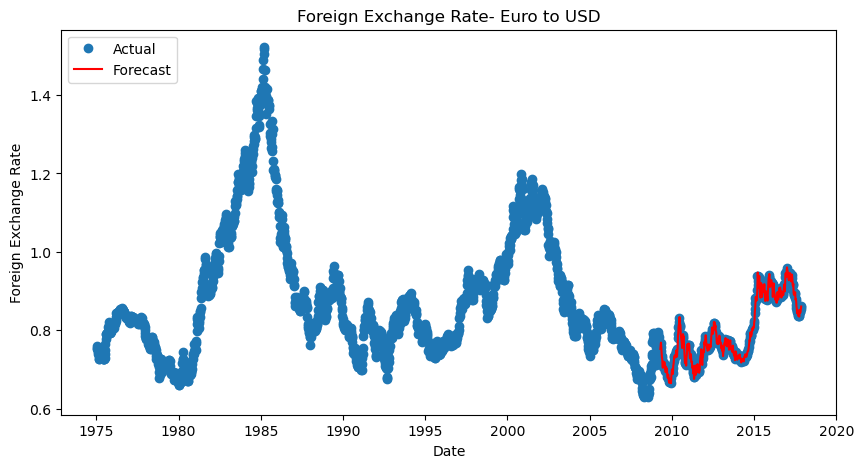

In [40]:
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate- Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label = 'Actual')
ax.plot(predictions_df, 'r', label = 'Forecast')
legend = ax.legend(loc = 'upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate - Euro to USD.png')

**Creating the pickle file with the best model that gives high Evaluation Score for the test data**

In [41]:
pickle.dump(model_fit,open('Best Model.pkl','wb'))